In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, mean_squared_error



[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset loaded. Total images: 1987
Train set: (1589, 128, 128, 1), Test set: (398, 128, 128, 1)


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,345 (14.13 MB)

 Trainable params: 3,705,345 (14.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 23s 209ms/step - accuracy: 0.6495 - loss: 0.6311 - val_accuracy: 0.9748 - val_loss: 0.1225
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - accuracy: 0.9633 - loss: 0.1130 - val_accuracy: 0.9748 - val_loss: 0.0659
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.9776 - loss: 0.0621 - val_accuracy: 0.9748 - val_loss: 0.0540
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 197ms/step - accuracy: 0.9818 - loss: 0.0497 - val_accuracy: 0.9811 - val_loss: 0.0523
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.9829 - loss: 0.0313 - val_accuracy: 0.9874 - val_loss: 0.0338
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 235ms/step - accuracy: 0.9891 - loss: 0.0294 - val_accuracy: 0.9874 - val_loss: 0.0264
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 391ms/step - accuracy: 0.9923 - loss: 0.0174 - val_accuracy: 0.9874 - val_loss: 0.0262
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 46s 443ms/step - accuracy: 0.9908 - loss: 0.0201 - val_accu

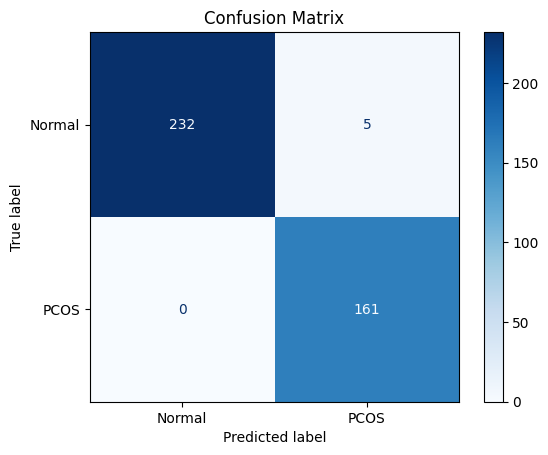

In [1]:
# PCOS Classifier - Full Jupyter Notebook

# Cell 1 - Install dependencies
!pip install numpy pandas matplotlib seaborn opencv-python tensorflow scikit-learn

# Cell 2 - Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Cell 3 - Load and preprocess dataset
dataset_path = "dataset"  # Your folder should contain 'normal' and 'pcos' subfolders
img_size = 128

data = []
labels = []

for label, category in enumerate(["normal", "pcos"]):
    folder_path = os.path.join(dataset_path, category)
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(label)
        except Exception as e:
            print(f"Error reading {img_path}: {e}")

X = np.array(data) / 255.0
X = X.reshape(-1, img_size, img_size, 1)
y = np.array(labels)

print(f"Dataset loaded. Total images: {len(X)}")

# Cell 4 - Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

# Cell 5 - Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Cell 6 - Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)

# Cell 7 - Evaluate model
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "PCOS"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



In [2]:
# Cell 8 - Save model
model.save("pcos_model.h5")
print("Model saved as pcos_model.h5")

Model saved as pcos_model.h5
